In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("stud.csv")

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or observation

There are no missing values

In [8]:
## Check Duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# To check all the columns unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [13]:
# Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights or Observation

* From the above description of numerical data,all means are very close to each other between 66 and 69
* All the standard deviation are close between 14.6 - 15.19
* While there is a minimum of 0 for maths and other are having 17 and 10 value

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!="O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype=="O"]

In [16]:
df[numerical_feature]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [17]:
df[categorical_feature]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [18]:
[feature for feature in df.columns]

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [19]:
df["total_score"]=(df["math_score"]+df["reading_score"]+df["writing_score"])

In [20]:
df["average_score"]= df["total_score"]/3

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<function matplotlib.pyplot.show(close=None, block=None)>

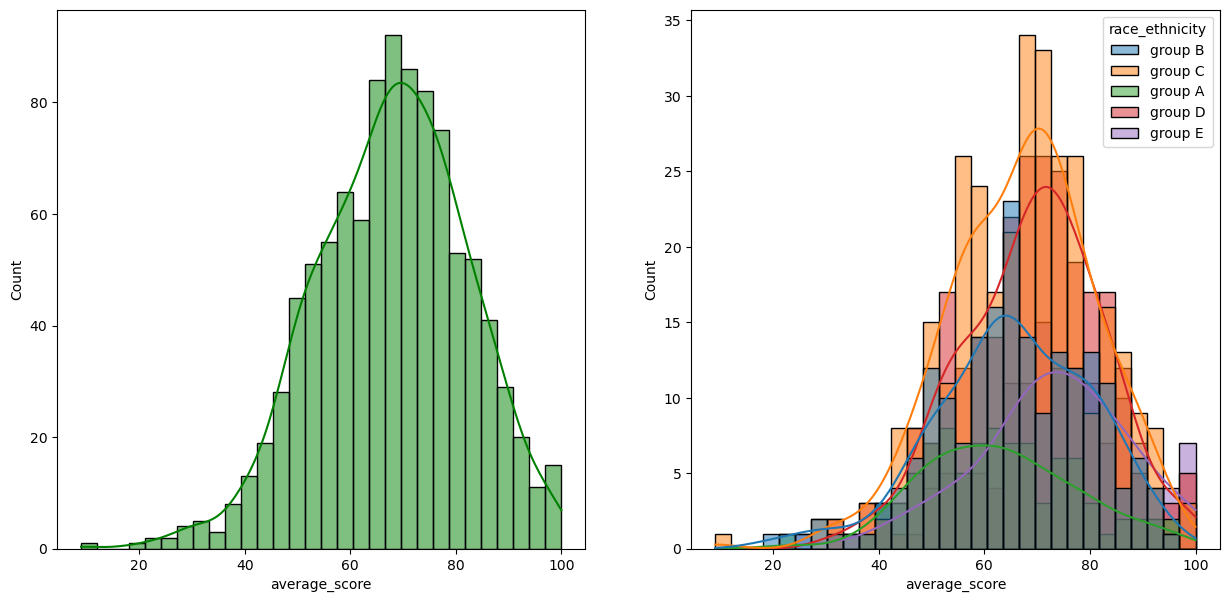

In [26]:
#Explore more about visualisation
fig,axis =plt.subplots(1,2,figsize=(15,7)) # 1,2 means 1 row 2 columns
plt.subplot(121) # 
sns.histplot(data=df, x="average_score",bins=30,kde = True,color="g") 
plt.subplot(122)
sns.histplot(data=df, x="average_score",bins=30,kde = True,hue="race_ethnicity") # hue is nothing but a kind of new graph which shows all the unique features in the column how they are distributed
plt.show

## Insights
* Female student tend to perform well than male students

(<Figure size 2500x600 with 3 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object))

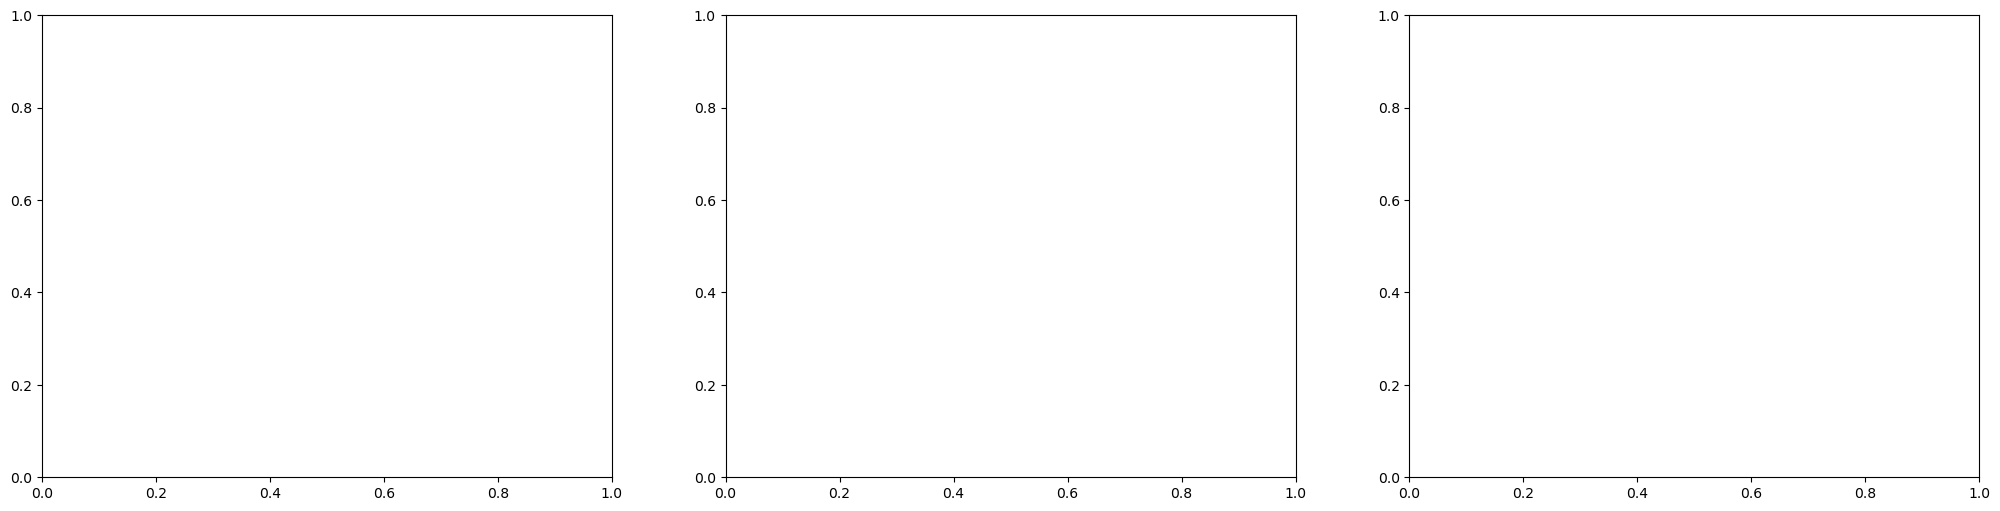

In [24]:
plt.subplots(1,3,figsize=(25,6)) # from this we can say that 1 row 3 subplots

(<Figure size 2500x600 with 6 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object))

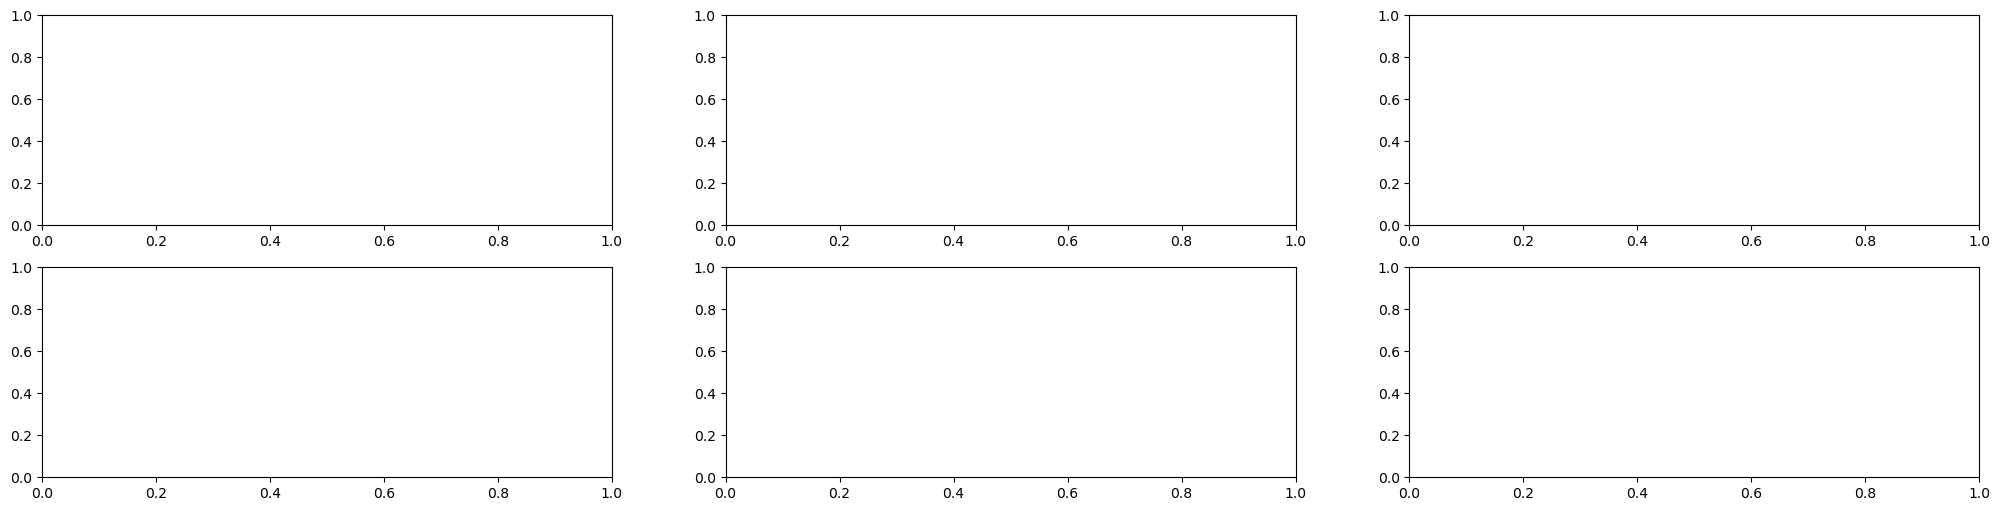

In [27]:
plt.subplots(2,3,figsize=(25,6))

(<Figure size 2500x600 with 3 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object))

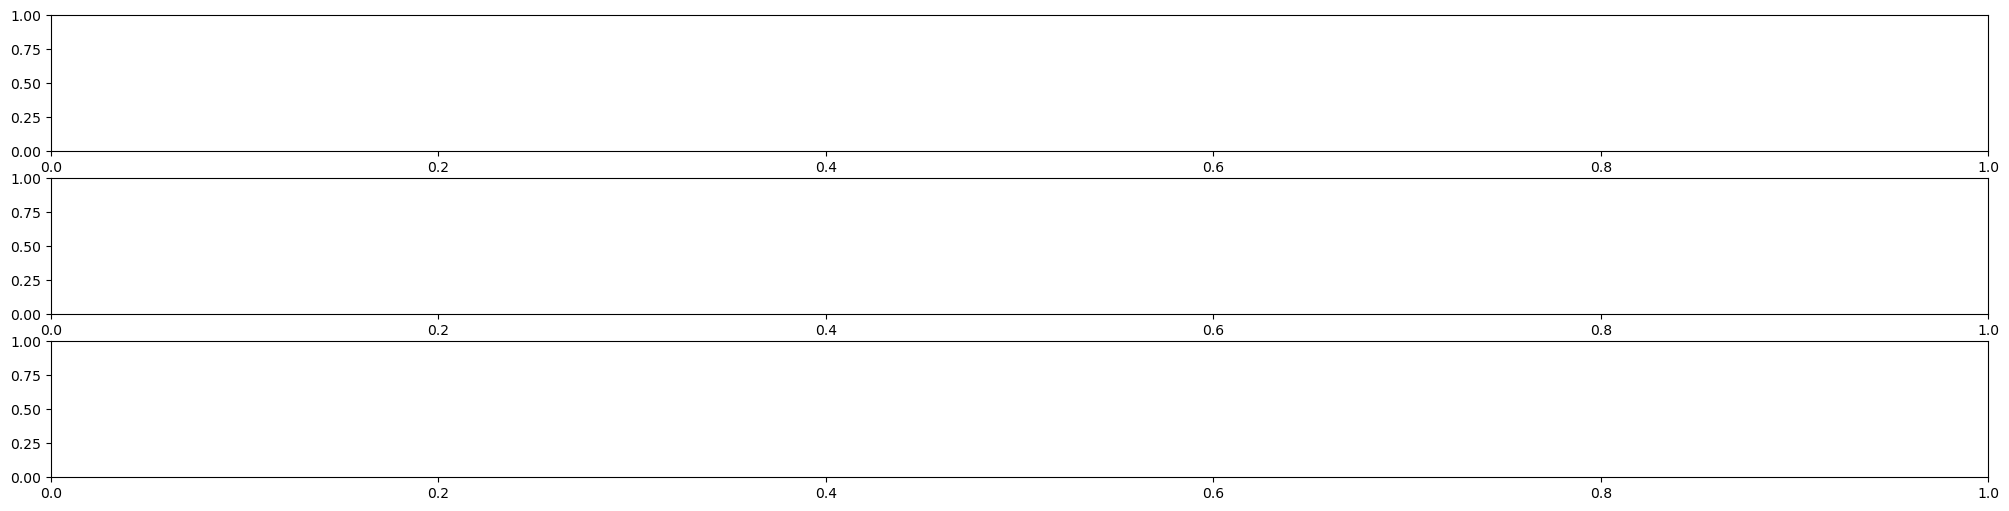

In [31]:
plt.subplots(3,1,figsize=(25,6))

<AxesSubplot: xlabel='average_score', ylabel='Count'>

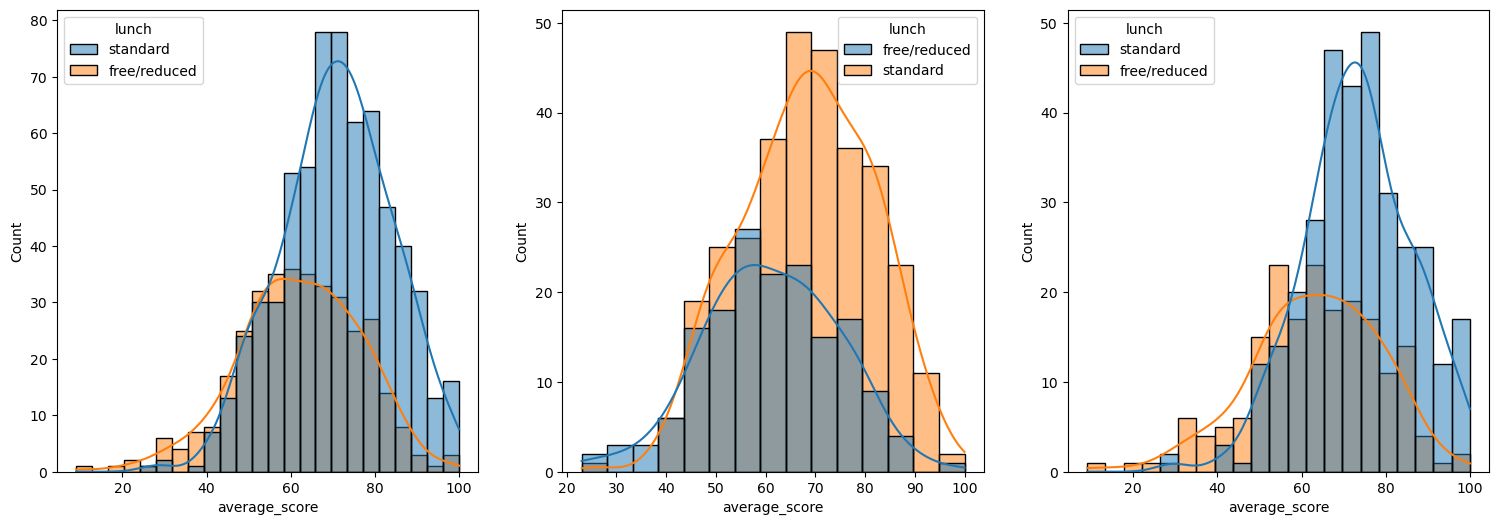

In [51]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x="average_score",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="male"],x="average_score",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average_score",kde=True,hue="lunch")


* Standard lunch help students perform well in exams
* standard lunch helps perform well in exams be it a male and female

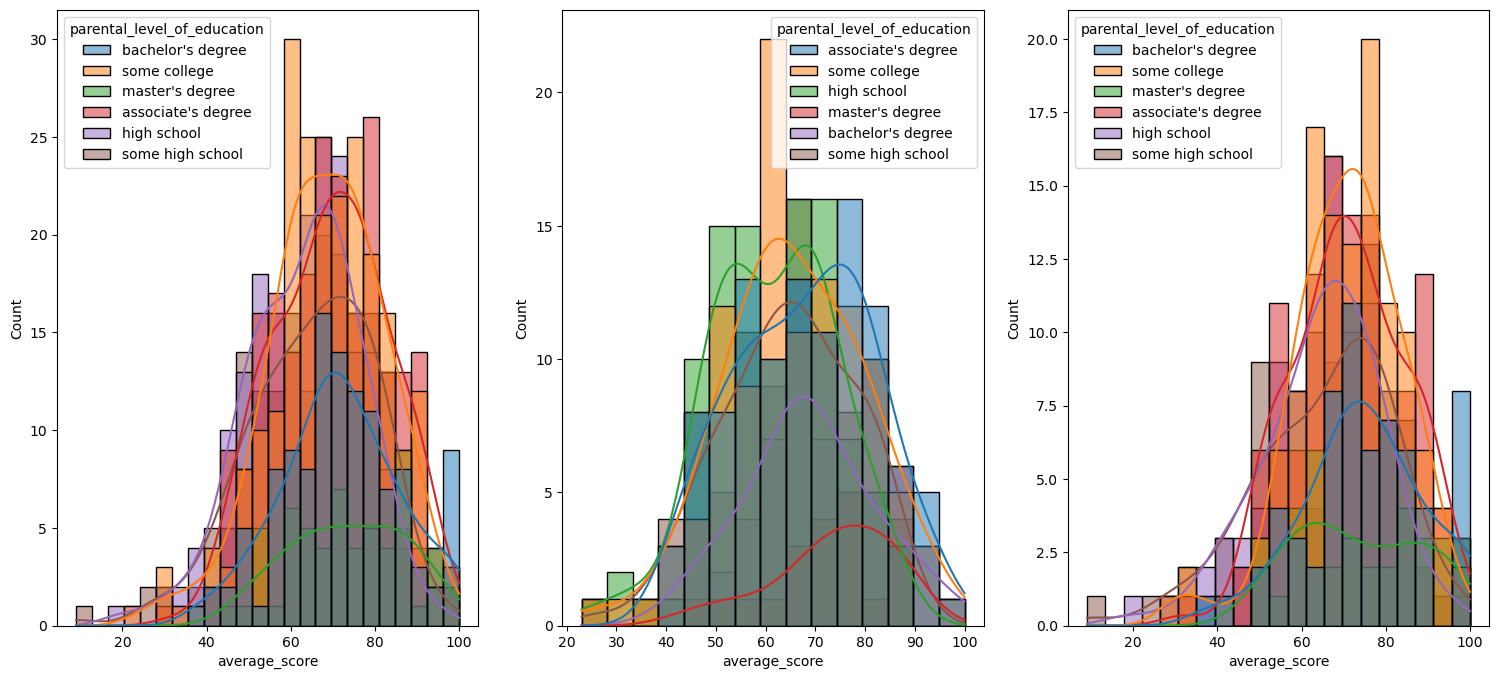

In [58]:
plt.subplots(1,3,figsize = (25,8))
plt.subplot(141)
sns.histplot(data=df,x="average_score",kde = True,hue="parental_level_of_education")
plt.subplot(142)
sns.histplot(data=df[df.gender=="male"],x="average_score",kde =True,hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average_score",kde =True,hue="parental_level_of_education")
plt.show()

* In parent's education don't help student perform well in exam.
* 2nd plot shows that whose education is of associate's degree or master's degree their male child tend to perfom well in exam
* 3rd plot we can see there is no effect of parent's eduction on female students.

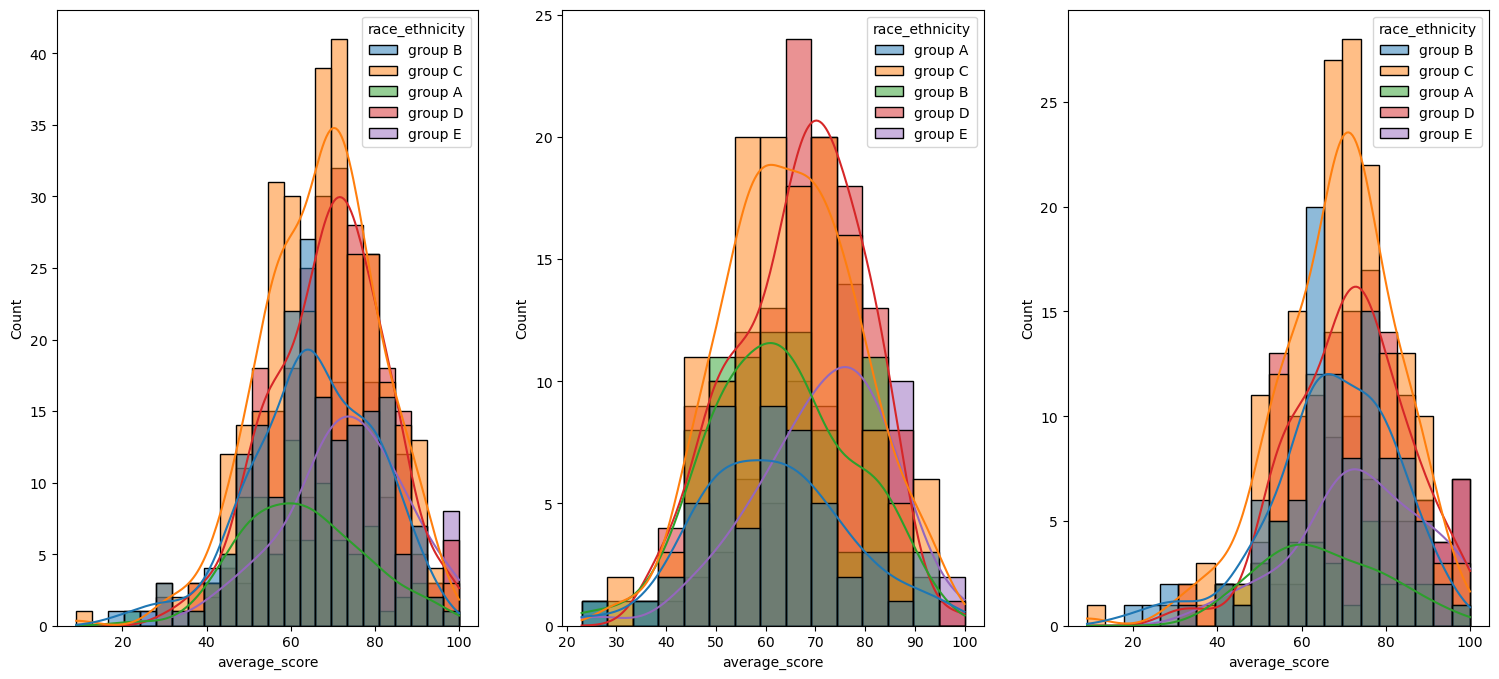

In [59]:
plt.subplots(1,3,figsize = (25,8))
plt.subplot(141)
sns.histplot(data=df,x="average_score",kde = True,hue="race_ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender=="male"],x="average_score",kde =True,hue="race_ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average_score",kde =True,hue="race_ethnicity")
plt.show()

* students of group A amd group B tends to perform poorly in exam.
* students of group A and group B tends to perform poor in exam irrespective of whether they are male or female.

<AxesSubplot: >

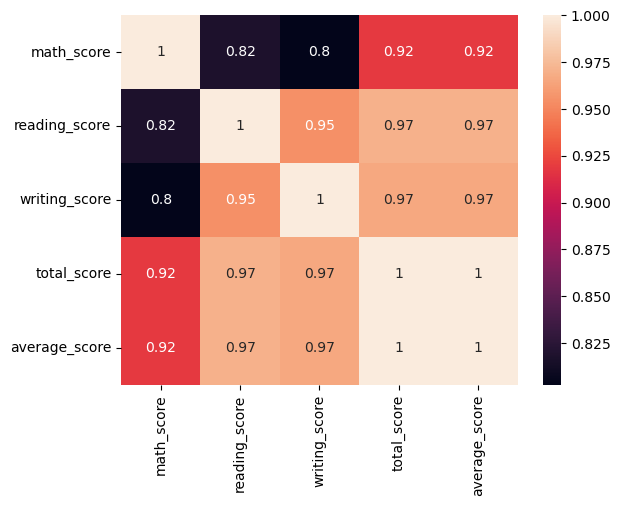

In [63]:
sns.heatmap(df.corr(),annot = True)